# Projet 3 - Concevez une application au service de la santé publique  


L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


## Notebook d'analyse des données

### Importation  des librairies

In [1]:
# Importer les librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import decomposition
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import neighbors
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from scipy import stats,spatial

%matplotlib inline
plt.style.use('ggplot') #Style des tracés

### Lecture de la base de données Openfoodfacts

Pour importer les données dans ce fichier, nous utiliserons la fonction read csv et on lui passe le chemin de fichier: en.openfoodfacts.org.products.


- Faisons apparaître les cinq premiers rangés de la base de données.

In [2]:
# Charger l'ensemble de donnée openfoodfacts
food= pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

# Afficher les premières lignes
food.head()

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3499/3556920223.py:2: DtypeWarning: Columns (0,9,15,24,25,29,30,31,33,51,65,70,87,148) have mixed types. Specify dtype option on import or set low_memory=False.
  food= pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,nutrinet-sante,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,Andrè,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,stephane,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,Skyr,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Faisons apparaître les cinq derniers rangés de la base de données.

In [3]:
# Les 5 dernières lignes 
food.tail()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
2837599,35033264,http://world-en.openfoodfacts.org/product/3503...,kiliweb,1583067829,2020-03-01T13:03:49Z,1681320470,2023-04-12T17:27:50Z,xdesnoyers,DooWap,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837600,39240958,http://world-en.openfoodfacts.org/product/3924...,kiliweb,1522995251,2018-04-06T06:14:11Z,1681320420,2023-04-12T17:27:00Z,xdesnoyers,Doowap,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837601,72355671,http://world-en.openfoodfacts.org/product/7235...,kiliweb,1558252418,2019-05-19T07:53:38Z,1680877496,2023-04-07T14:24:56Z,itsjustruby,Almond Butter,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837602,7610095217400,http://world-en.openfoodfacts.org/product/7610...,foodrepo,1548769173,2019-01-29T13:39:33Z,1681375880,2023-04-13T08:51:20Z,kiliweb,Chili paprika,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837603,8076809568074,http://world-en.openfoodfacts.org/product/8076...,tacinte,1438619294,2015-08-03T16:28:14Z,1681585668,2023-04-15T19:07:48Z,prepperapp,Pesto Genovese CREMA,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Analyse des variables


À cette étape, nous tentons de déterminer quelles variables sont simultanément:


- Utile à l'exploration.
- Discerner pour classer les observations et dans une seconde étape.
- Qui ont une forte cadence d'exécution.

Pour ce qui est du dernier point, il est acceptable de considérer des observations dont certaines variables ne sont pas remplies à deux conditions:

- En ce qui concerne l'observation, la proportion de variables retenues non remplies est faible.
- Dans l'ensemble, le taux de finalisation global pour chacune des variables reste élevé.

Dans les deux cas, il sera possible de prendre en considération des stratégies d'imputation pour remplir les valeurs manquantes.

Nous commençons avec l'affichage de toutes les variables.




In [4]:
def test_finalization(data):
    
    """
    Calculer le taux d’achèvement trié et le nombre de valeurs manquantes pour chaque variable de l’argument dans un ordre décroissant
    
    Objectifs :
        données (jeu de données) : un jeu de données avec des variables
        
    Retours :
        Une base de données spécifique avec un taux d’achèvement pour chaque variable. 
        Schéma :
            Index(chaîne) : Noms de variables
            Taux de completion (float) : taux de completion
            Nombre de valeurs manquantes(int) : Nombre de valeurs manquantes
    """
    
    var_dict = {}
    
    for col in food.columns:
        var_dict[col] = []
        var_dict[col].append(round((food[col].notna().sum()/data.shape[0])*100,2))
        var_dict[col].append(food[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de finalization", "Nombre de valeurs manquantes"]).sort_values(by="Taux de finalization", ascending=False)

In [5]:
pd.set_option('display.max_rows', 80)
test_finalization(food)

,Taux de finalization,Nombre de valeurs manquantes
code,100.0,0
creator,100.0,4
created_t,100.0,0
created_datetime,100.0,0
last_modified_t,100.0,0
...,...,...
erythritol_100g,0.0,2837585
casein_100g,0.0,2837533
serum-proteins_100g,0.0,2837507
nucleotides_100g,0.0,2837546


In [6]:
# Analyse du type de variable dans la base de données
food.dtypes

code                   object
url                    object
creator                object
created_t               int64
created_datetime       object
                       ...   
choline_100g          float64
phylloquinone_100g    float64
beta-glucan_100g      float64
inositol_100g         float64
carnitine_100g        float64
Length: 201, dtype: object

In [7]:
# Afficher les noms de colonnes de la variable food
for colname in food:
    print(colname)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
last_modified_by
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
ingredients_tags
ingredients_analysis_tags
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutrition_data
additives_n
additives
additives_tags
additives_en
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
states_tags
states_en
brand_owner
ecoscore_score
ecoscore_grade
nutrient_levels_tags
product_quantity
owner
data_quality_errors_tags
unique_scans_n
popular

In [8]:
# Afficher la taille de nombres de ligne et de colonnes
print('lignes: ',food.shape[0],'\n colonnes: ',food.shape[1])

lignes:  2837604 
 colonnes:  201


In [9]:
# Voir les valeurs de types de la base de données 
food.dtypes.value_counts()

float64    125
object      74
int64        2
dtype: int64

In [10]:
# Description des variables qualitatives
food.select_dtypes(['object']).head()

,code,url,creator,created_datetime,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,generic_name,quantity,...,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,alcohol_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,2021-06-16T14:53:28Z,2021-06-16T14:53:29Z,nutrinet-sante,jeunes pousses,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2022-07-04T15:30:10Z,2022-07-04T15:30:13Z,kiliweb,Andrè,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,690.0,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2021-09-01T08:11:51Z,2022-06-29T07:35:06Z,stephane,L.casei,NaN,NaN,NaN,...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2022-06-03T09:58:31Z,2022-06-03T15:34:34Z,quentinbrd,Skyr,NaN,NaN,480 g,...,en:cream-cheeses,Cream cheeses,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,238.0,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,kiliweb,Vitória crackers,NaN,NaN,NaN,...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,1569.0,NaN


In [11]:
# Les valeurs de types numeriques
food.select_dtypes(['number']).head()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,additives_n,nutriscore_score,nova_group,ecoscore_score,product_quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,1623855208,1623855209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1656948610,1656948613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1630483911,1656488106,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1654250311,1654270474,NaN,NaN,NaN,NaN,-5.0,NaN,34.0,480.0,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1529059080,1561463718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Voir les informations de la base de donnée 
food.info(verbose= True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837604 entries, 0 to 2837603
Data columns (total 201 columns):
 #    Column                                                 Non-Null Count    Dtype  
---   ------                                                 --------------    -----  
 0    code                                                   2837604 non-null  object 
 1    url                                                    2837604 non-null  object 
 2    creator                                                2837600 non-null  object 
 3    created_t                                              2837604 non-null  int64  
 4    created_datetime                                       2837604 non-null  object 
 5    last_modified_t                                        2837604 non-null  int64  
 6    last_modified_datetime                                 2837604 non-null  object 
 7    last_modified_by                                       2710933 non-null  object 
 8    product_na

In [13]:
# Verifier si tous les elements d'une ligne et d'une colonne manquent de valeurs
food.isna().sum()

code                        0
url                         0
creator                     4
created_t                   0
created_datetime            0
                       ...   
choline_100g          2837502
phylloquinone_100g    2835892
beta-glucan_100g      2837550
inositol_100g         2837521
carnitine_100g        2837557
Length: 201, dtype: int64

In [14]:
# La taille totale des valeurs manquantes de la base de donnée
food.isna().sum().sum()

446808172

In [15]:
food.notna().mean(axis=0)*100

code                  100.000000
url                   100.000000
creator                99.999859
created_t             100.000000
created_datetime      100.000000
                         ...    
choline_100g            0.003595
phylloquinone_100g      0.060333
beta-glucan_100g        0.001903
inositol_100g           0.002925
carnitine_100g          0.001656
Length: 201, dtype: float64

<Axes: >

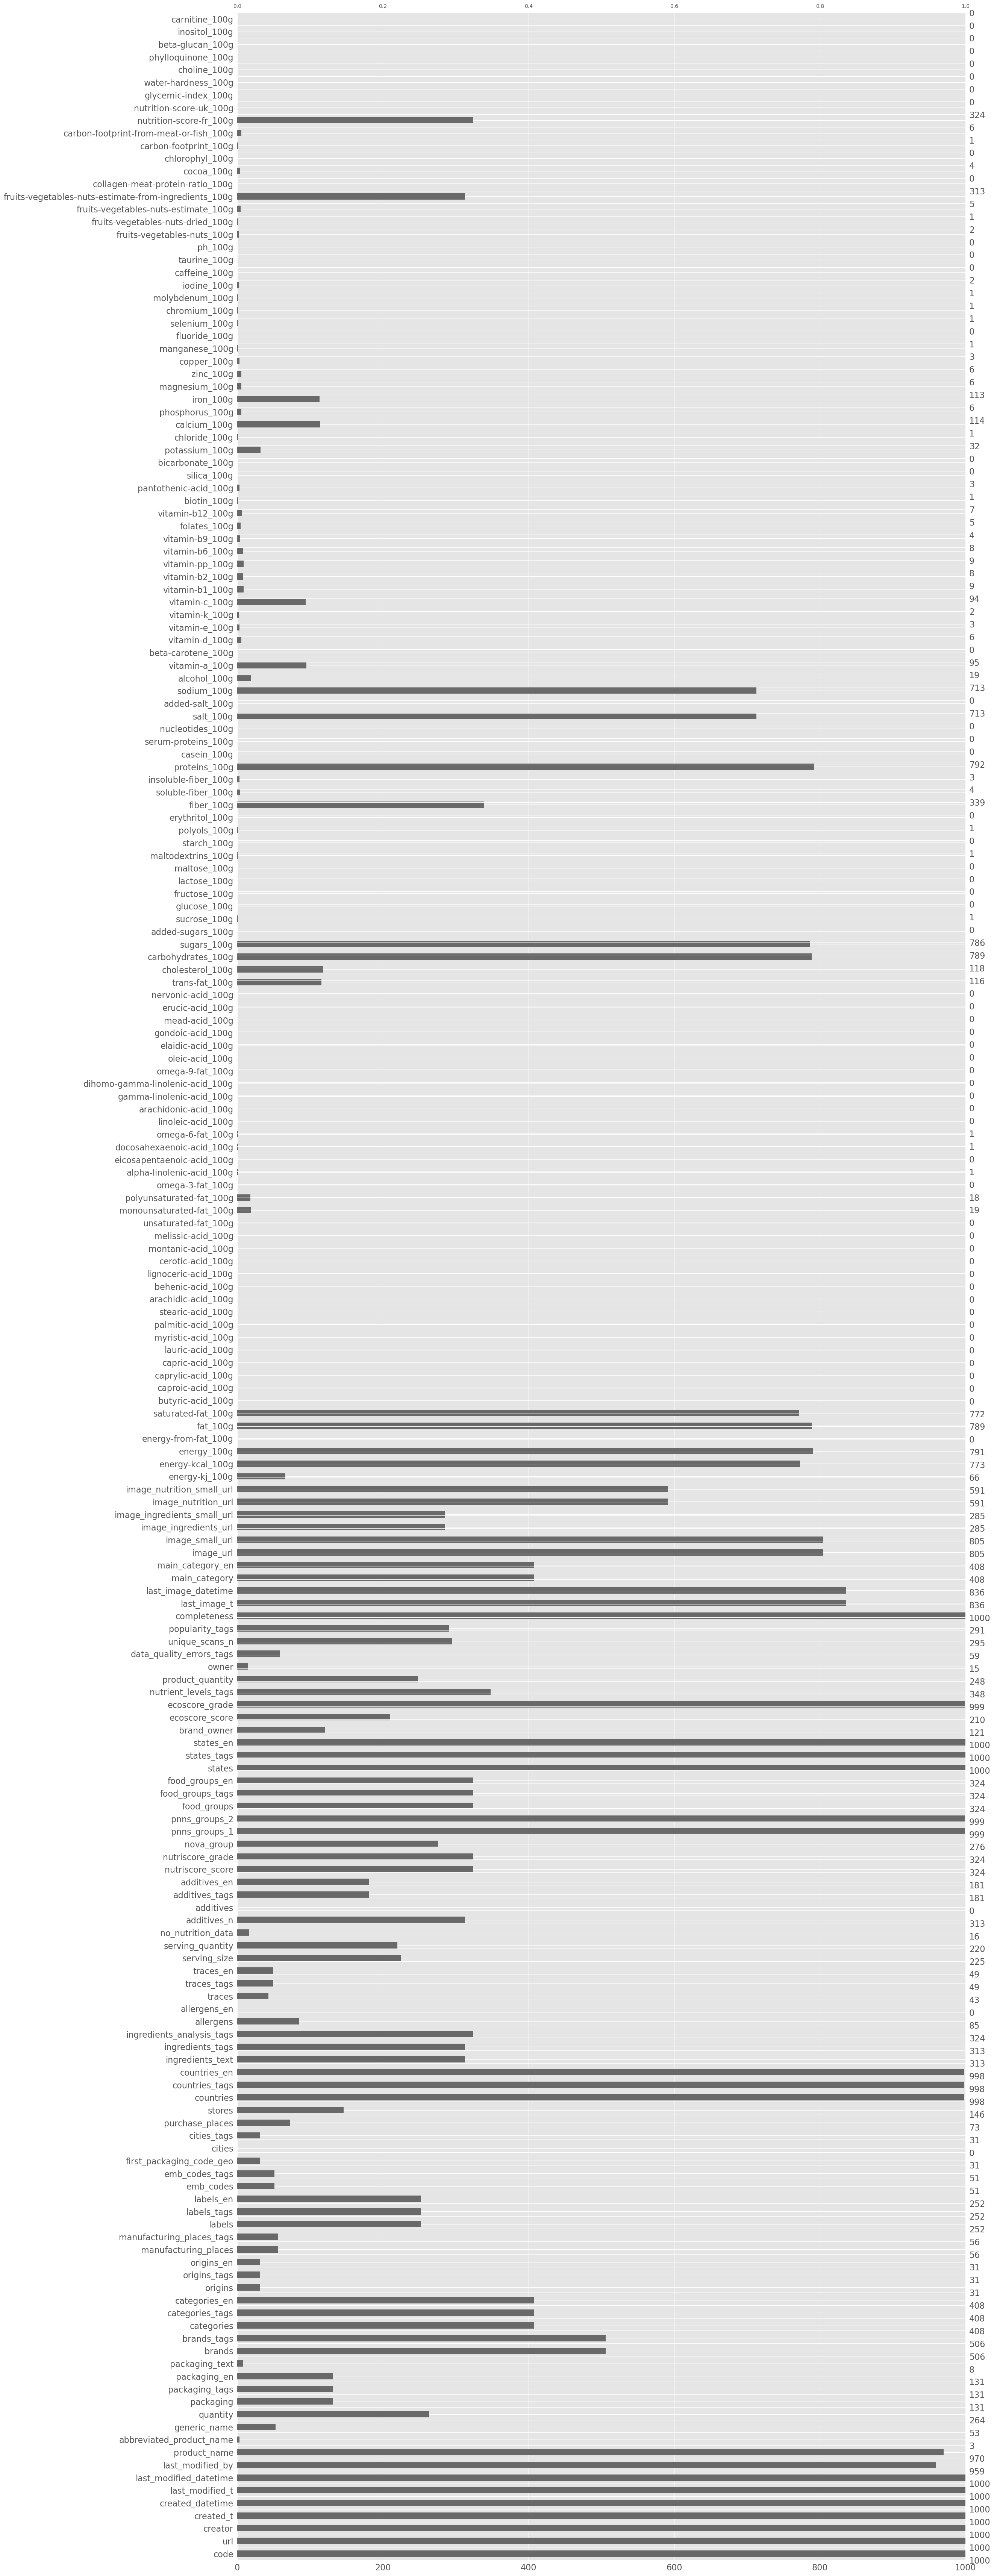

In [16]:
# Visualisation des valeurs manquantes de base de données food
msno.bar(food.sample(1000))

In [17]:
# Description de la base de donnée
food.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,additives_n,nutriscore_score,nova_group,ecoscore_score,product_quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,2.837604e+06,2.837604e+06,0.0,0.0,5.853160e+05,829594.000000,921740.000000,759900.000000,659044.000000,6.999270e+05,...,12636.000000,921743.000000,3.000000,6.000000,1.000,102.000000,1712.000000,54.000000,83.000000,47.000000
mean,1.589297e+09,1.632173e+09,NaN,NaN,2.088371e+28,1.987637,9.217469,3.346996,47.513866,1.673043e+13,...,605.202593,9.217490,18.666667,40.950000,1.475,7.100276,0.068920,3.446852,1.853387,0.024027
std,6.334998e+07,4.110316e+07,NaN,NaN,1.597728e+31,2.853604,8.659291,1.007759,25.524879,1.088296e+16,...,5897.248981,8.659288,6.027714,18.779111,NaN,42.543941,1.826776,2.748296,11.564513,0.082211
min,1.328021e+09,1.353582e+09,NaN,NaN,0.000000e+00,0.000000,-15.000000,1.000000,-30.000000,0.000000e+00,...,0.049000,-15.000000,13.000000,14.000000,1.475,0.000000,0.000000,0.400000,0.001350,0.000800
25%,1.544982e+09,1.598519e+09,NaN,NaN,2.800000e+01,0.000000,2.000000,3.000000,28.000000,1.500000e+02,...,103.600000,2.000000,15.500000,32.250000,1.475,0.037075,0.000008,2.225000,0.008150,0.007000
50%,1.595600e+09,1.644547e+09,NaN,NaN,5.600000e+01,1.000000,10.000000,4.000000,46.000000,2.834952e+02,...,322.200000,10.000000,18.000000,41.500000,1.475,0.087000,0.000023,3.600000,0.024000,0.011000
75%,1.643180e+09,1.666686e+09,NaN,NaN,1.200000e+02,3.000000,16.000000,4.000000,71.000000,5.000000e+02,...,611.000000,16.000000,21.500000,47.525000,1.475,0.134500,0.000094,4.000000,0.051000,0.015000
max,1.681956e+09,1.681957e+09,NaN,NaN,1.222357e+34,50.000000,40.000000,4.000000,125.000000,9.000000e+18,...,656298.600000,40.000000,25.000000,70.000000,1.475,390.000000,54.000000,20.000000,75.000000,0.572000


## Filtrage du jeu de donnée 

Afin de faire un premier tri, nous filtrerons les observations sur la présence de valeurs sur un ensemble de variables que nous pensons pouvoir définir les produits.

In [18]:
food_notna = food[food['product_name'].notna() & food['brands'].notna() & food['pnns_groups_1'].notna() & food['pnns_groups_2'].notna() & food['nutriscore_grade'].notna() & food['nova_group'].notna()]
print(f"Nombre d'observations où les variables sélectionnées sont représentées: {food_notna.shape[0]}")
print(f"Pourcentage des observations filtrées sur l'ensemble des données: {food_notna.shape[0]/food.shape[0]*100:.2f}%")

Nombre d'observations où les variables sélectionnées sont représentées: 436935
Pourcentage des observations filtrées sur l'ensemble des données: 15.40%


In [19]:
finalization_notna=test_finalization(food_notna)
finalization_notna

,Taux de finalization,Nombre de valeurs manquantes
code,649.43,0
states_en,649.43,0
creator,649.43,4
created_t,649.43,0
created_datetime,649.43,0
...,...,...
gamma-linolenic-acid_100g,0.00,2837585
cities,0.00,2837604
erythritol_100g,0.00,2837585
unsaturated-fat_100g,0.00,2837588


In [20]:
print(f"Nombre d'observations avec une variable product_name nutella ou Nutella {food[(food['product_name'] == 'Nutella') | (food['product_name'] == 'nutella')].shape[0]}")
print('20 premières observations avec un product_name "Nutella" ou "nutella":')
display(food[(food['product_name'] == 'Nutella') | (food['product_name'] == 'nutella')].head())

Nombre d'observations avec une variable product_name nutella ou Nutella 293
20 premières observations avec un product_name "Nutella" ou "nutella":


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
822,0000080135876,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1479729948,2016-11-21T12:05:48Z,1479729948,2016-11-21T12:05:48Z,canieatthis-app,Nutella,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,0000080176800,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1548684719,2019-01-28T14:11:59Z,1644579176,2022-02-11T11:32:56Z,packbot,Nutella,NaN,...,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4003,0004000401621,http://world-en.openfoodfacts.org/product/0004...,prepperapp,1679579228,2023-03-23T13:47:08Z,1679579230,2023-03-23T13:47:10Z,prepperapp,Nutella,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6662,0009800000753,http://world-en.openfoodfacts.org/product/0009...,openfoodfacts-contributors,1543864132,2018-12-03T19:08:52Z,1634032005,2021-10-12T09:46:45Z,charlesnepote,Nutella,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6950,0009800870028,http://world-en.openfoodfacts.org/product/0009...,kiliweb,1657374127,2022-07-09T13:42:07Z,1659630786,2022-08-04T16:33:06Z,teolemon,Nutella,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Format timestamp des colonnes

In [21]:
# Les colonnes qui contiennent le _t et le _datetime
food.loc[:,'created_t'] = pd.to_datetime(food['created_t'], unit='s')
food.loc[:,'last_modified_t'] = pd.to_datetime(food['last_modified_t'], unit='s')
food.loc[:,'created_datetime'] = pd.to_datetime(food['created_datetime'])
food.loc[:,'last_modified_datetime'] = pd.to_datetime(food['last_modified_datetime'])

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3499/134637006.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  food.loc[:,'created_datetime'] = pd.to_datetime(food['created_datetime'])
/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3499/134637006.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  food.loc[:,'last_modified_datetime'] = pd.to_datetime(food['last_modified_datetime'])


In [22]:
food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,2021-06-16 14:53:28,2021-06-16 14:53:28+00:00,2021-06-16 14:53:29,2021-06-16 14:53:29+00:00,nutrinet-sante,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2022-07-04 15:30:10,2022-07-04 15:30:10+00:00,2022-07-04 15:30:13,2022-07-04 15:30:13+00:00,kiliweb,Andrè,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2021-09-01 08:11:51,2021-09-01 08:11:51+00:00,2022-06-29 07:35:06,2022-06-29 07:35:06+00:00,stephane,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2022-06-03 09:58:31,2022-06-03 09:58:31+00:00,2022-06-03 15:34:34,2022-06-03 15:34:34+00:00,quentinbrd,Skyr,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:38:00+00:00,2019-06-25 11:55:18,2019-06-25 11:55:18+00:00,kiliweb,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# interessant pour la recherche d'ingredient mais tres consommateur de ressourse
test1= food.copy()
test1['ingredients_text'] = test1['ingredients_text'].str.split(',')
test1['allergens'] = test1['allergens'].str.split(',')
test1['additives_en'] = test1['additives_en'].str.split(',')

In [24]:
#recherche d'entrees dupliques
food[food.duplicated(subset='code')==True]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
291199,71923722898,http://world-en.openfoodfacts.org/product/0071...,openfoodfacts-contributors,2018-09-23 06:01:33,2018-09-23 06:01:33+00:00,2022-04-14 07:53:49,2022-04-14 07:53:49+00:00,kiliweb,Frosted Flakes,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442194,210,http://world-en.openfoodfacts.org/product/0210...,foodvisor,2023-01-25 02:24:36,2023-01-25 02:24:36+00:00,2023-01-25 02:24:36,2023-01-25 02:24:36+00:00,foodvisor,Chitosan Fibre Complex,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457939,2216,http://world-en.openfoodfacts.org/product/0221...,date-limite-app,2019-02-05 13:55:11,2019-02-05 13:55:11+00:00,2019-11-01 20:04:18,2019-11-01 20:04:18+00:00,tacite-mass-editor,Kürbiswürfel,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458589,22314010100,http://world-en.openfoodfacts.org/product/0223...,foodrepo,2019-01-29 13:03:31,2019-01-29 13:03:31+00:00,2019-08-28 16:02:31,2019-08-28 16:02:31+00:00,fixbot,"Clément Faugier, Crème de Marrons de l'Ardèche",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470903,256704,http://world-en.openfoodfacts.org/product/0256...,openfoodfacts-contributors,2019-09-30 09:40:40,2019-09-30 09:40:40+00:00,2019-09-30 09:57:28,2019-09-30 09:57:28+00:00,NaN,Pressed apple juice with elderflower,NaN,...,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711880,8716671000172,http://world-en.openfoodfacts.org/product/8716...,openfoodfacts-contributors,2017-11-11 10:01:27,2017-11-11 10:01:27+00:00,2022-02-10 15:20:17,2022-02-10 15:20:17+00:00,ecoscore-impact-estimator,Huile de noix de coco Kokosolie,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2732813,8722700628927,http://world-en.openfoodfacts.org/product/8722...,telperion87,2021-11-07 14:06:32,2021-11-07 14:06:32+00:00,2022-05-25 16:39:27,2022-05-25 16:39:27+00:00,kiliweb,GELATO PANNA,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2733999,8760304600357,http://world-en.openfoodfacts.org/product/8760...,nutrinet-sante,2022-07-01 12:00:56,2022-07-01 12:00:56+00:00,2022-07-01 15:49:02,2022-07-01 15:49:02+00:00,tacite,Feuilletés et tuiles,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2754633,89036311434,http://world-en.openfoodfacts.org/product/8903...,foodvisor,2023-03-31 00:37:57,2023-03-31 00:37:57+00:00,2023-03-31 00:37:57,2023-03-31 00:37:57+00:00,foodvisor,"Syrup, Caramel",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 - Nova_Group

In [25]:
food['nova_group'].value_counts()

4.0    479975
3.0    147115
1.0     83483
2.0     49327
Name: nova_group, dtype: int64

In [26]:
food['nova_group'] = food['nova_group'].astype('category')

In [27]:
food[['nutriscore_grade','nova_group']].notna().sum()

nutriscore_grade    921740
nova_group          759900
dtype: int64

- Rechercher une alimentation de femme enceinte.


Pain, céréales et autres sucres lents (légumes) à chaque repas selon l'appétit. produits laitiers trois fois par jour, protéines (viande, poisson ou oeufs), tous les jours eau illimitée.

In [28]:
food['vitamin-b12_100g'].notna().sum()/len(food)*100

0.5058845420291203

In [29]:
food['calcium_100g'].notna().sum()/len(food)*100

9.761862472705845

In [30]:
food['iron_100g'].notna().sum()/len(food)*100

9.493290818592023

In [31]:
food[(food['vitamin-b12_100g'].notna())].sort_values('vitamin-b12_100g',ascending = False).head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
807361,17115698,http://world-en.openfoodfacts.org/product/1711...,waistline-app,2022-01-27 21:06:10,2022-01-27 21:06:10+00:00,2023-01-02 14:23:44,2023-01-02 14:23:44+00:00,charlesnepote,Vegan essentials,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2115003,7501008040331,http://world-en.openfoodfacts.org/product/7501...,rodgamergo72,2022-01-29 06:07:32,2022-01-29 06:07:32+00:00,2022-02-10 17:07:37,2022-02-10 17:07:37+00:00,packbot,Serial Concha,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2762362,8992753005482,http://world-en.openfoodfacts.org/product/8992...,openfoodfacts-contributors,2021-12-28 06:09:38,2021-12-28 06:09:38+00:00,2023-02-09 13:36:01,2023-02-09 13:36:01+00:00,foodless,Frisian Flag,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2053997,6154000041267,http://world-en.openfoodfacts.org/product/6154...,openfoodfacts-contributors,2021-11-29 23:01:49,2021-11-29 23:01:49+00:00,2022-02-11 13:22:00,2022-02-11 13:22:00+00:00,packbot,margarine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1406015,3662072085056,http://world-en.openfoodfacts.org/product/3662...,jolive,2022-01-24 18:31:09,2022-01-24 18:31:09+00:00,2022-10-04 23:02:11,2022-10-04 23:02:11+00:00,roboto-app,Multi vitamines,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2763159,8996001302316,http://world-en.openfoodfacts.org/product/8996...,mondetactica,2021-12-29 04:01:08,2021-12-29 04:01:08+00:00,2022-02-11 13:25:39,2022-02-11 13:25:39+00:00,packbot,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1840712,5021265220076,http://world-en.openfoodfacts.org/product/5021...,waistline-app,2022-01-27 21:09:35,2022-01-27 21:09:35+00:00,2022-11-04 14:49:49,2022-11-04 14:49:49+00:00,allergies-app-chakib,Feroglobin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149302,41318290356,http://world-en.openfoodfacts.org/product/0041...,org-database-usda,2020-04-23 17:04:27,2020-04-23 17:04:27+00:00,2020-04-23 17:04:27,2020-04-23 17:04:27+00:00,org-database-usda,Corn cereal frosted flakes,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
782857,100930,http://world-en.openfoodfacts.org/product/1009...,elcoco,2019-10-17 19:20:48,2019-10-17 19:20:48+00:00,2022-01-18 13:11:04,2022-01-18 13:11:04+00:00,mosesjohann,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983132,5600445615712,http://world-en.openfoodfacts.org/product/5600...,rbncpnt,2021-08-03 11:45:41,2021-08-03 11:45:41+00:00,2022-10-04 13:37:25,2022-10-04 13:37:25+00:00,roboto-app,Levedura Nutricional Engevita®,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
food[(food['iron_100g'].notna())].sort_values('iron_100g',ascending = False).head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1840712,5021265220076,http://world-en.openfoodfacts.org/product/5021...,waistline-app,2022-01-27 21:09:35,2022-01-27 21:09:35+00:00,2022-11-04 14:49:49,2022-11-04 14:49:49+00:00,allergies-app-chakib,Feroglobin,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807361,17115698,http://world-en.openfoodfacts.org/product/1711...,waistline-app,2022-01-27 21:06:10,2022-01-27 21:06:10+00:00,2023-01-02 14:23:44,2023-01-02 14:23:44+00:00,charlesnepote,Vegan essentials,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089770,7038010016516,http://world-en.openfoodfacts.org/product/7038...,ddhbend,2021-06-10 20:44:29,2021-06-10 20:44:29+00:00,2021-06-10 20:52:10,2021-06-10 20:52:10+00:00,ddhbend,Skivet Nøkkel Lettost 16% Fett,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2069329,6408430000654,http://world-en.openfoodfacts.org/product/6408...,stoori74,2021-07-21 16:18:36,2021-07-21 16:18:36+00:00,2021-07-21 16:30:35,2021-07-21 16:30:35+00:00,stoori74,Luomu rasvaton maito,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491332,03483183,http://world-en.openfoodfacts.org/product/0348...,martinshadok,2020-09-08 08:29:07,2020-09-08 08:29:07+00:00,2020-09-08 08:31:36,2020-09-08 08:31:36+00:00,martinshadok,iron,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403932,0146,http://world-en.openfoodfacts.org/product/0146...,labeleat,2018-12-02 19:58:36,2018-12-02 19:58:36+00:00,2023-01-02 07:32:46,2023-01-02 07:32:46+00:00,tacite,Batido nutricional / Nutricional Shake,NaN,...,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520671,3770001220314,http://world-en.openfoodfacts.org/product/3770...,openfoodfacts-contributors,2018-10-07 20:10:01,2018-10-07 20:10:01+00:00,2022-10-25 23:23:51,2022-10-25 23:23:51+00:00,roboto-app,Laitue de Mer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2057765,6194003220252,http://world-en.openfoodfacts.org/product/6194...,kiliweb,2018-05-07 22:03:27,2018-05-07 22:03:27+00:00,2023-02-27 17:32:02,2023-02-27 17:32:02+00:00,guezguez-majed,double concentré de tomates,NaN,...,NaN,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602716,4014500512716,http://world-en.openfoodfacts.org/product/4014...,kiliweb,2021-07-11 09:32:55,2021-07-11 09:32:55+00:00,2023-04-10 10:53:13,2023-04-10 10:53:13+00:00,user0000,"Élőflórás, erdei gyümölcsös sovány joghurt éde...",NaN,...,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2149637,7613036212823,http://world-en.openfoodfacts.org/product/7613...,waistline-app,2018-09-27 05:02:54,2018-09-27 05:02:54+00:00,2022-03-17 20:04:13,2022-03-17 20:04:13+00:00,NaN,Nesquik 30% weniger Zucker,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Rechercher la meilleure nourriture à l'aide d'un scanner.


Nous aurons un remplacement pour BN CHOCOLAT.

In [33]:
# Nous aurons un remplacement pour BN CHOCOLAT. 
food[food['code']=='3061990141354'].head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g


In [34]:
pd.set_option('max_colwidth', 800)
food[food['code']=='3061990141354'][['generic_name','categories']].head(10)

,generic_name,categories


 - Pays d'origine pour l'application

In [35]:
#foodcontries=food
food_countries = food.copy()
food_countries['countries'].value_counts().head(20)

France              450439
United States       314406
en:fr               284735
en:us               225962
en:it               180139
en:es               157961
España               89633
en:france            85087
en:ca                64159
en:gb                49747
en:germany           44372
en:be                44242
en:de                37876
en:ch                35619
en:United States     27231
en:France            25675
en:FR                25596
Deutschland          25513
en:Germany           24493
en:au                20819
Name: countries, dtype: int64

- Selection la France pour l'application

In [36]:
# Selection la France pour l'application
countrieFrance = food_countries['countries'].str.lower().str.contains('fr', na=False, regex=False)
food_countries[countrieFrance]['countries'].shape

(975949,)

In [37]:
food_countries=food_countries[countrieFrance]

In [38]:
cols_100g = [x for x in food.columns if  '_100g' in x]

In [39]:
df= food.reindex(['nutriscore_score']+cols_100g,axis=1)
df.head(10)

,nutriscore_score,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,165.0,690.0,NaN,2.0,2.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1.4,0.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-5.0,NaN,57.0,238.0,NaN,0.2,0.10,NaN,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,375.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,685.8,163.9,685.8,NaN,1.9,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,194.0,812.0,NaN,11.0,3.90,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,874.9,3661.0,NaN,15.1,6.10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.0,0.0,NaN,0.0,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Récupération des colonnes avec moins de NaN

In [40]:
# Récupération des colonnes avec moins de80% de NaN
cols = []
for i in range(len(df.columns)):
    temp =int(df[df.columns[i]].isnull().sum()/df.shape[0]*100)
    print(df.columns[i],' - ', temp, '% de cellules vides' )
    if temp < 80 : 
        cols.append(df.columns[i]) 

nutriscore_score  -  67 % de cellules vides
energy-kj_100g  -  92 % de cellules vides
energy-kcal_100g  -  23 % de cellules vides
energy_100g  -  21 % de cellules vides
energy-from-fat_100g  -  99 % de cellules vides
fat_100g  -  21 % de cellules vides
saturated-fat_100g  -  23 % de cellules vides
butyric-acid_100g  -  99 % de cellules vides
caproic-acid_100g  -  99 % de cellules vides
caprylic-acid_100g  -  99 % de cellules vides
capric-acid_100g  -  99 % de cellules vides
lauric-acid_100g  -  99 % de cellules vides
myristic-acid_100g  -  99 % de cellules vides
palmitic-acid_100g  -  99 % de cellules vides
stearic-acid_100g  -  99 % de cellules vides
arachidic-acid_100g  -  99 % de cellules vides
behenic-acid_100g  -  99 % de cellules vides
lignoceric-acid_100g  -  99 % de cellules vides
cerotic-acid_100g  -  99 % de cellules vides
montanic-acid_100g  -  99 % de cellules vides
melissic-acid_100g  -  99 % de cellules vides
unsaturated-fat_100g  -  99 % de cellules vides
monounsaturated

In [41]:
cols.remove('energy-kcal_100g')
cols.remove('nutrition-score-fr_100g')
cols.remove('fruits-vegetables-nuts-estimate-from-ingredients_100g')
cols

['nutriscore_score',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [42]:
df=df.reindex(columns=cols)
df.head()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,690.0,2.0,2.00,65.0,12.6,3.0,1.5,NaN,NaN
2,NaN,NaN,1.4,0.90,9.8,9.8,NaN,2.7,0.10,0.040
3,-5.0,238.0,0.2,0.10,3.9,3.9,NaN,10.0,0.09,0.036
4,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560


In [43]:
df['nutriscore_score'].isnull().sum()

1915864

In [44]:
df=df[df['nutriscore_score'].notnull()]
df.shape[0]

921740

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921740 entries, 3 to 2837603
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nutriscore_score    921740 non-null  float64
 1   energy_100g         919125 non-null  object 
 2   fat_100g            919083 non-null  float64
 3   saturated-fat_100g  918755 non-null  float64
 4   carbohydrates_100g  918771 non-null  float64
 5   sugars_100g         918975 non-null  float64
 6   fiber_100g          508643 non-null  float64
 7   proteins_100g       919077 non-null  float64
 8   salt_100g           919600 non-null  float64
 9   sodium_100g         919600 non-null  float64
dtypes: float64(9), object(1)
memory usage: 77.4+ MB


In [46]:
# Nous pouvons avoir accès au nombre de lignes et de colonnes du Df :
df.shape[0]

921740

In [47]:
variable = cols[2:]
variable

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3499/1982203835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sugars_100g'])


Text(0.5, 1.0, 'Distribution de sugars_100g avant le nottoyage')

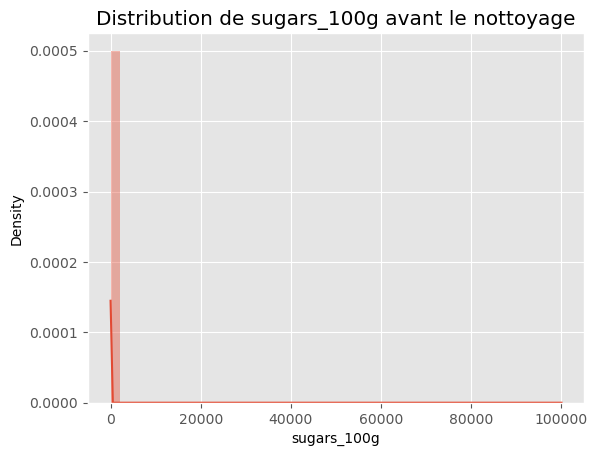

In [48]:
sns.distplot(df['sugars_100g'])
plt.title('Distribution de sugars_100g avant le nottoyage')

In [49]:
# Pour que la boucle définisse comme NaN les valeurs >100g ou <0g

replace = 0
for i in range(df.shape[0]):
    for j in range(2,len(df.columns)):
        if not np.isnan(df.iat[i,j]):
            if ((df.iat[i,j]<0)|(df.iat[i,j]>100)):
                df.iat[i,j] = np.nan
                replace +=1
replace  

1019

In [50]:
df['sugars_100g'].describe()

count    918917.000000
mean         12.624661
std          18.583261
min           0.000000
25%           0.600000
50%           3.570000
75%          17.000000
max         100.000000
Name: sugars_100g, dtype: float64

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3499/3986861423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sugars_100g'])


Text(0.5, 1.0, 'Distribution de sugars_100g après le nettoyage')

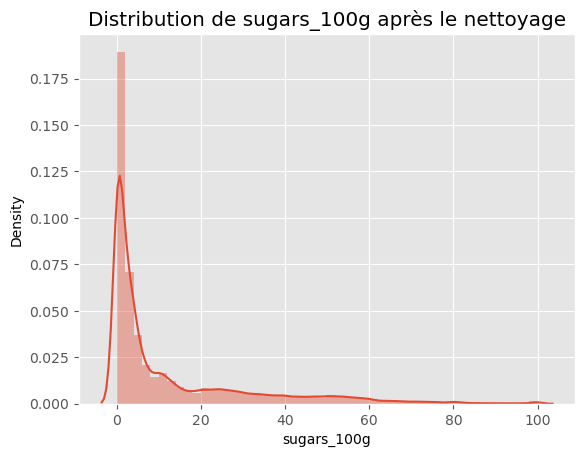

In [51]:
sns.distplot(df['sugars_100g'])
plt.title('Distribution de sugars_100g après le nettoyage')

In [52]:
for i in range(2,len(df.columns)):
    print(cols[i],':\n',df[cols[i]].describe(),'\n-------------\n\n')

fat_100g :
 count    919035.000000
mean         14.637351
std          18.441307
min           0.000000
25%           1.100000
50%           8.000000
75%          22.800000
max         100.000000
Name: fat_100g, dtype: float64 
-------------


saturated-fat_100g :
 count    918741.000000
mean          5.307411
std           8.081252
min           0.000000
25%           0.100000
50%           2.000000
75%           7.500000
max         100.000000
Name: saturated-fat_100g, dtype: float64 
-------------


carbohydrates_100g :
 count    918632.000000
mean         27.544466
std          27.463411
min           0.000000
25%           3.570000
50%          15.000000
75%          52.000000
max         100.000000
Name: carbohydrates_100g, dtype: float64 
-------------


sugars_100g :
 count    918917.000000
mean         12.624661
std          18.583261
min           0.000000
25%           0.600000
50%           3.570000
75%          17.000000
max         100.000000
Name: sugars_100g, dtype: flo

## Traitement des Valeurs aberrantes 


- Nettoyage des Valeurs aberrantes pour les caractéristiques 100g (<0g & >100g)

In [53]:
#convertir la colonne en données numériques avant de faire la comparaison.
df['energy_100g'] = pd.to_numeric(df['energy_100g'], errors='coerce')

In [54]:
#Detecter les valeurs aberrantes 
df['energy_100g'].quantile([0.25,0.5,0.75,0.995])

0.250     459.0
0.500    1104.0
0.750    1682.0
0.995    3766.0
Name: energy_100g, dtype: float64

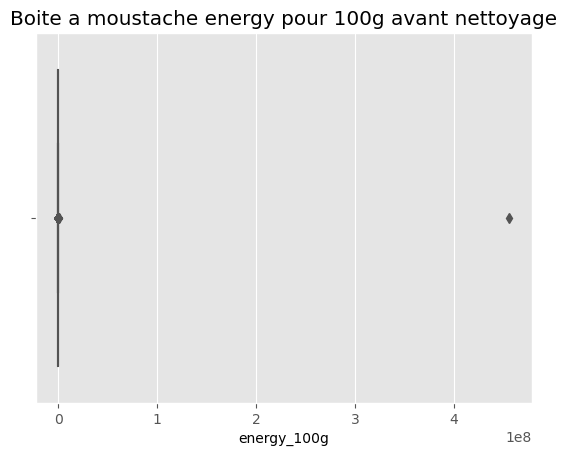

In [55]:
# Les valeurs aberrantes (technique visuelle)
sns.boxplot(x='energy_100g', data =df)
plt.title('Boite a moustache energy pour 100g avant nettoyage')
plt.show()

In [56]:
df['energy_100g']= df['energy_100g'].where(df['energy_100g']< df['energy_100g'].quantile(0.995))

Text(0.5, 1.0, 'Boite à moustache énergie après nettoyage')

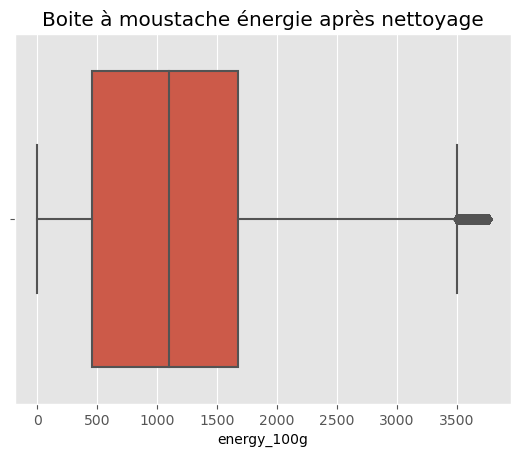

In [57]:
ax = sns.boxplot(x=df['energy_100g'])
plt.title('Boite à moustache énergie après nettoyage')

##  Traitement des Valeurs manquantes 
- Supprimer la ligne avec trop de NaN
- Visualisons les valeurs manquantes avec missingo

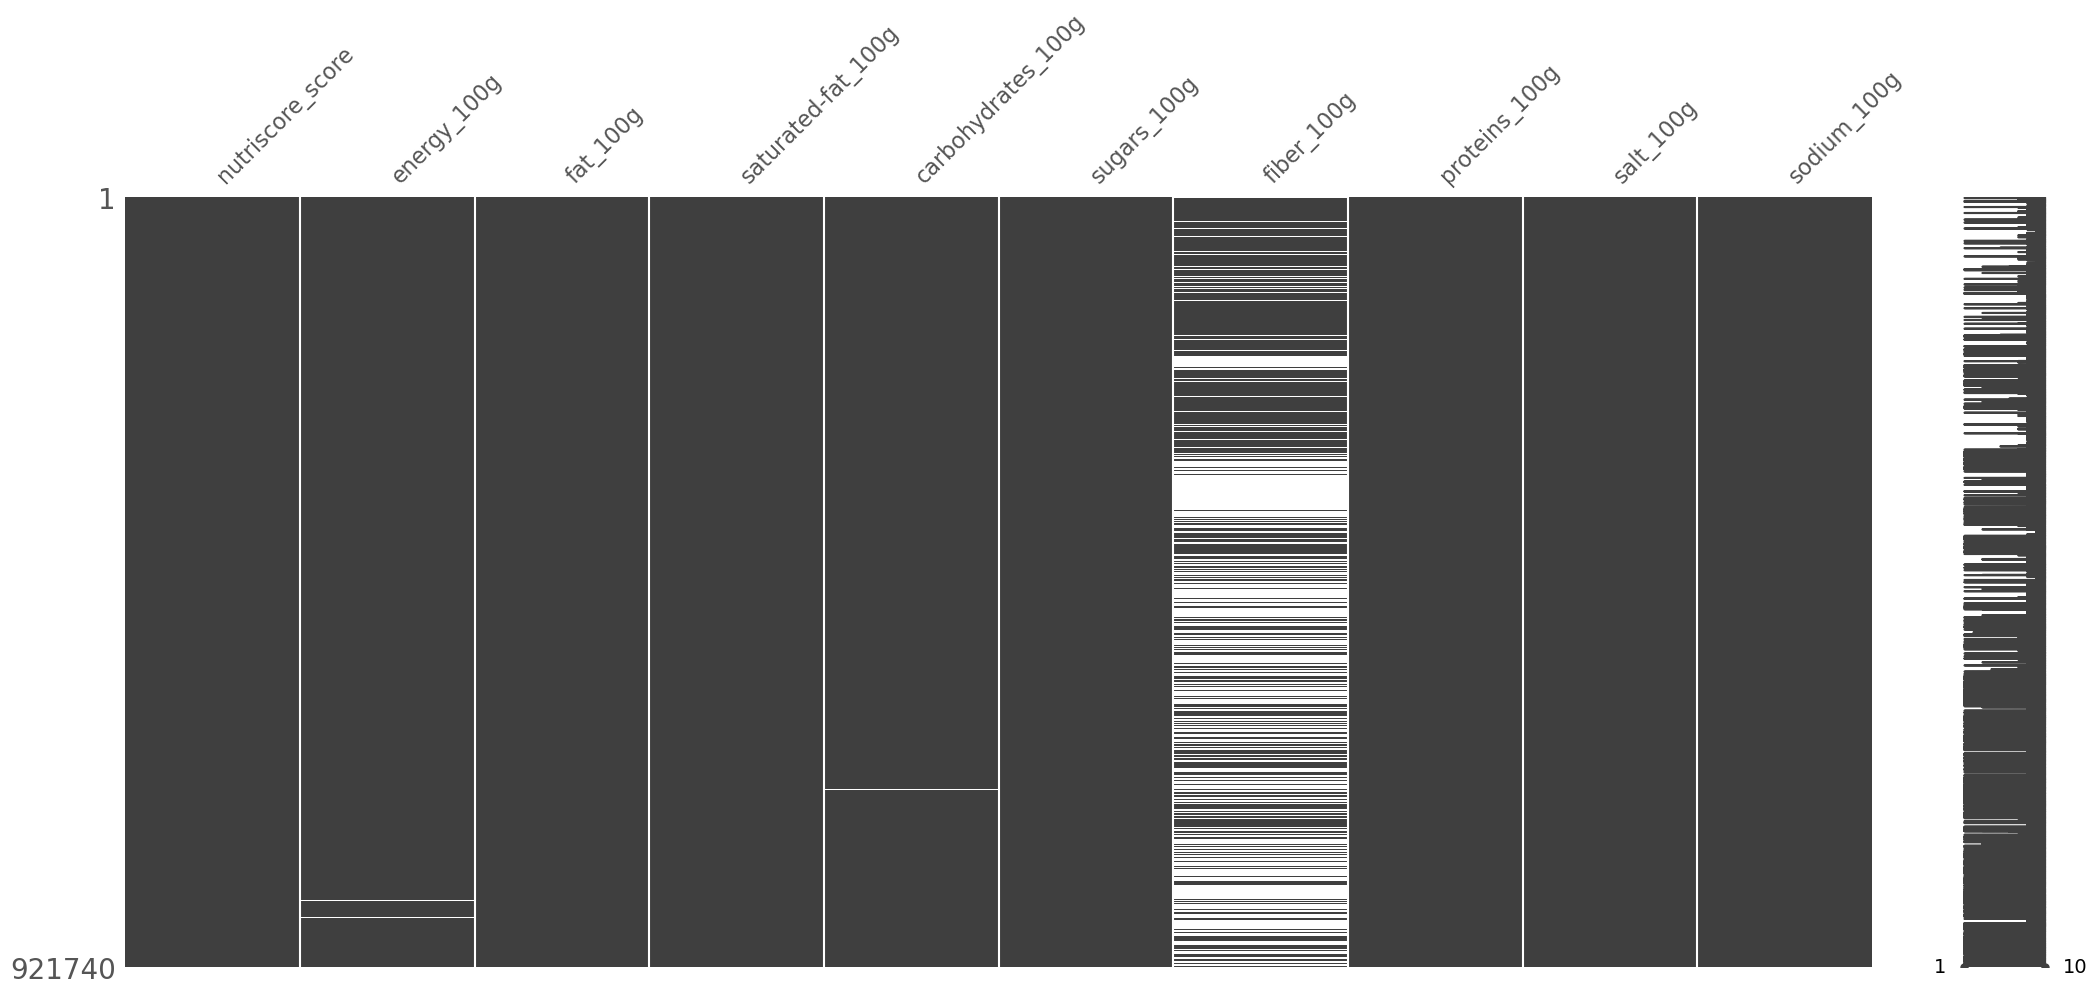

In [58]:
# Visualiser les valeurs manquantes avec missingo
msno.matrix(df)
plt.show()

In [59]:
df['nan']= len(df.columns)-df.count(axis=1)

In [60]:
df['nan'].describe()

count    921740.000000
mean          0.478187
std           0.666477
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: nan, dtype: float64

In [61]:
df=df[df['nan']<0]

In [62]:
df=df.drop(columns=['nan'])
df

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
3,-5.0,238.0,0.20000,0.100000,3.900000,3.900000,NaN,10.000000,0.090000,0.036000
11,18.0,936.0,8.20000,2.200000,29.000000,22.000000,0.0,5.100000,4.600000,1.840000
20,9.0,264.0,0.00000,0.000000,15.500000,15.500000,NaN,0.200000,0.000000,0.000000
23,1.0,134.0,0.30000,0.100000,5.300000,3.900000,NaN,0.900000,0.420000,0.168000
32,14.0,1594.0,22.00000,15.500000,27.300000,21.900000,4.4,4.600000,0.100000,0.040000
...,...,...,...,...,...,...,...,...,...,...
2837599,13.0,1423.0,12.10000,3.900000,47.400000,16.400000,NaN,8.300000,0.880000,0.352000
2837600,13.0,1402.0,11.50000,3.300000,48.400000,16.600000,NaN,8.300000,0.730000,0.292000
2837601,13.0,2564.0,54.83871,6.451613,19.354839,3.225806,NaN,19.354839,0.201613,0.080645
2837602,13.0,1960.0,22.00000,2.500000,59.000000,2.500000,4.5,6.000000,2.500000,1.000000


### Scaler + KNN(K-nearest neighbors)  pour remplacer les valeurs NaN restantes dans le dataset)

In [63]:
scaler = StandardScaler().fit(df)
scaled_df= scaler.transform(df)

In [64]:
import pickle
with open('scaler_1.pickle', 'wb') as file:
    pickle.dump(scaler, file)

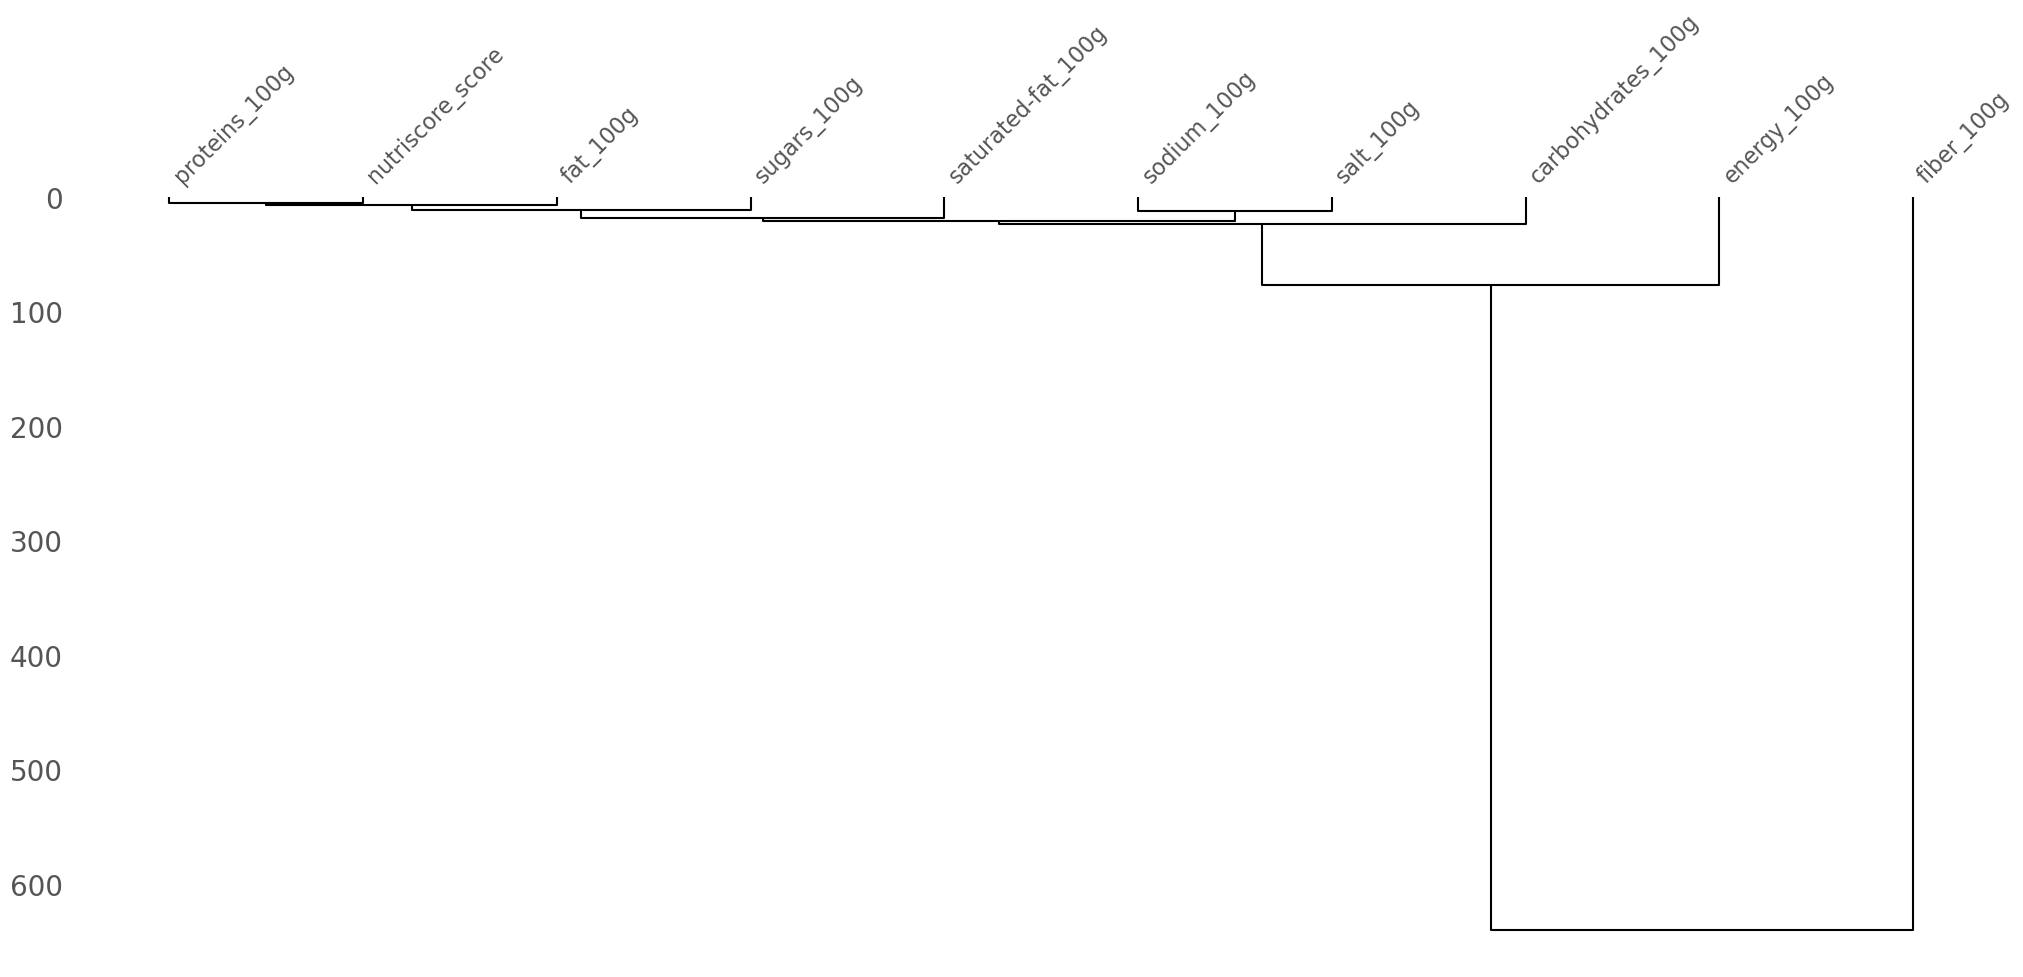

In [65]:
# Analyser la correlation entre les valeurs manquante
msno.dendrogram(df)
plt.show()

In [66]:
def traitementNAN(df,cols_target,cols_data):
    a_traiter = df[cols_target].isna().sum()/len(df)*100
    print(f'La colonne {cols_target} a {a_traiter:.2f} % de valeur manquantes à traiter')
    
    cols_total = cols_data
    cols_total.append(cols_target)
    dataSampindex = df[df[cols_target].notna()].sample(10000).index
    dataSamp = df.loc[dataSampindex,cols_total]
    dataSamp = dataSamp.dropna()
 
    data = dataSamp[cols_data]
    target = dataSamp[cols_target]
    xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)
    
    knn_df = neighbors.KNeighborsRegressor(n_neighbors=5)
    knn_df.fit(xtrain, ytrain)
    #calcule de précision
    print('\tscore R^2 : ',knn_df.score(xtest, ytest))

    return knn_df.predict(df[cols_data].fillna(value=0))

In [67]:
cols_a_compleler=['nutriscore_score',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

dic_cols={}
dic_error={}
for i in range(0,len(cols_a_compleler)):
    cols=cols_a_compleler.copy()
    index = cols.pop(i)
    dic_cols[index]=cols
    
for target, data in dic_cols.items():
    target_pred = target+'_pred'
    df[target_pred] = traitementNAN(df,target,data)

La colonne nutriscore_score a 0.00 % de valeur manquantes à traiter
	score R^2 :  0.8266563023078357
La colonne energy_100g a 0.62 % de valeur manquantes à traiter
	score R^2 :  0.999964097012379
La colonne fat_100g a 0.00 % de valeur manquantes à traiter
	score R^2 :  0.9296382213608836
La colonne saturated-fat_100g a 0.03 % de valeur manquantes à traiter
	score R^2 :  0.8122000115056858
La colonne carbohydrates_100g a 0.04 % de valeur manquantes à traiter
	score R^2 :  0.9670052050020677
La colonne sugars_100g a 0.01 % de valeur manquantes à traiter
	score R^2 :  0.9622707420796316
La colonne fiber_100g a 44.65 % de valeur manquantes à traiter
	score R^2 :  0.5073281177210094
La colonne proteins_100g a 0.00 % de valeur manquantes à traiter
	score R^2 :  0.815987152862899
La colonne salt_100g a 0.05 % de valeur manquantes à traiter
	score R^2 :  0.3191881126991496
La colonne sodium_100g a 0.03 % de valeur manquantes à traiter
	score R^2 :  0.3793218107282583


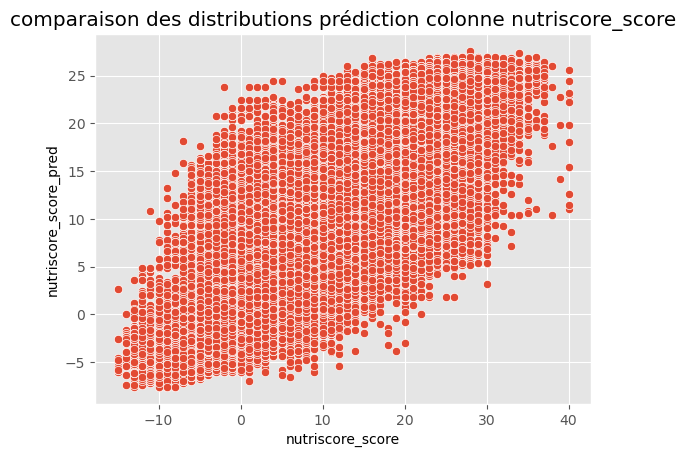

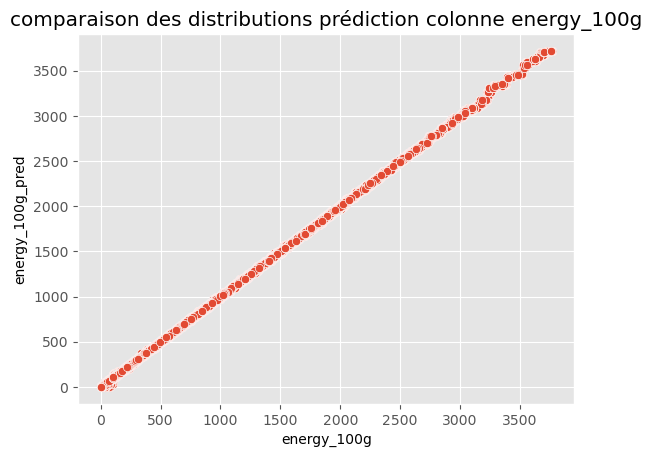

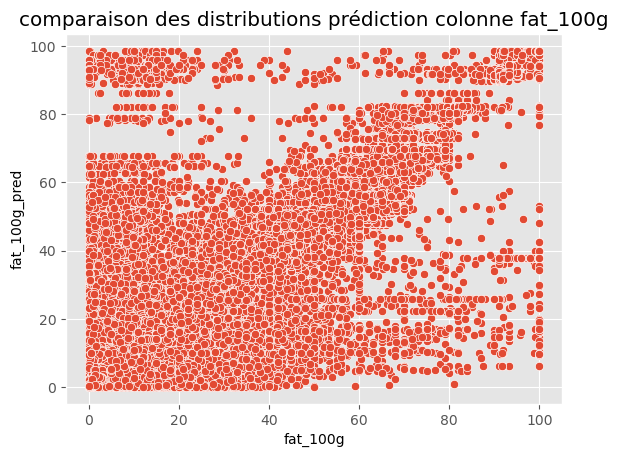

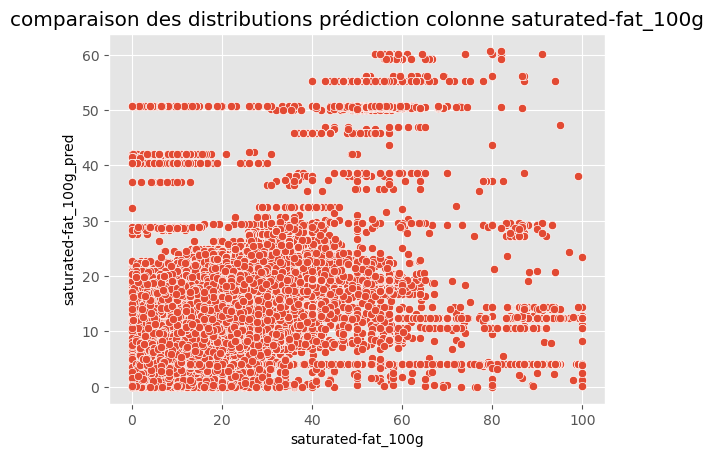

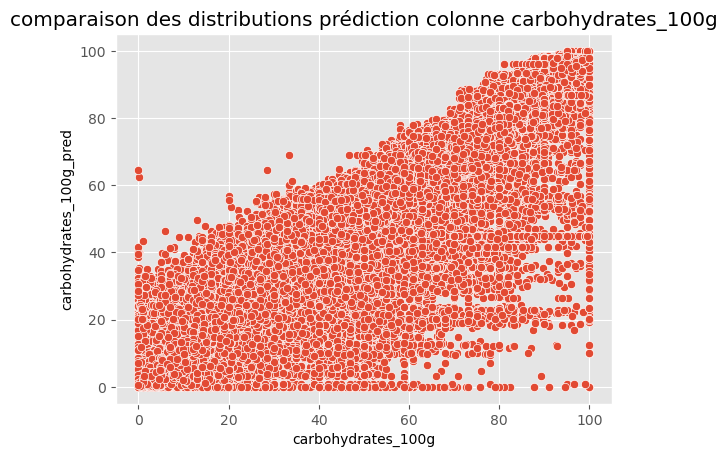

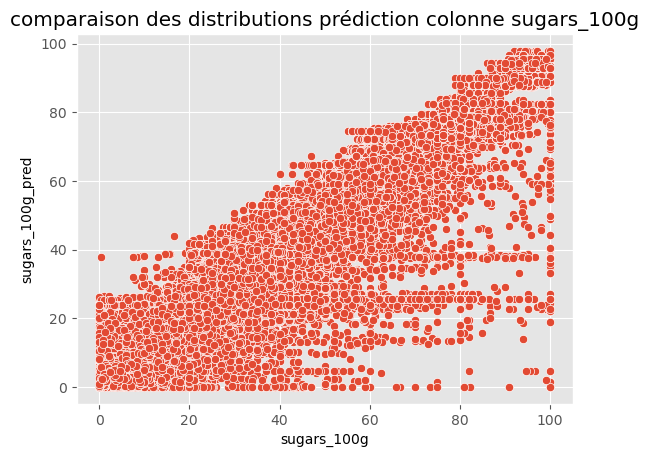

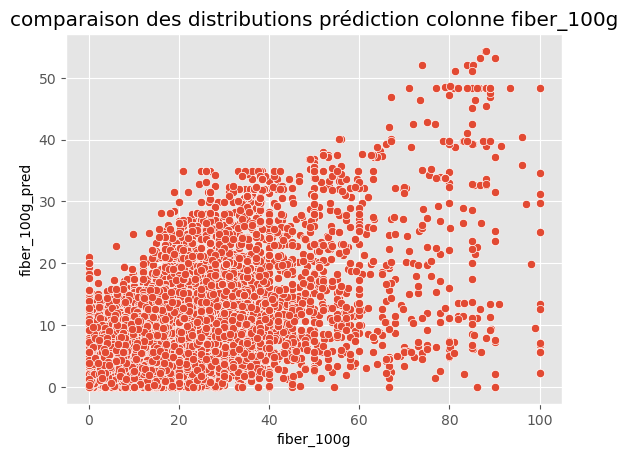

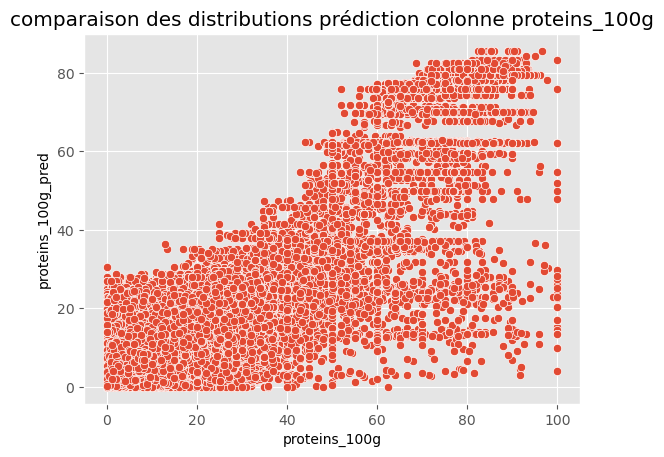

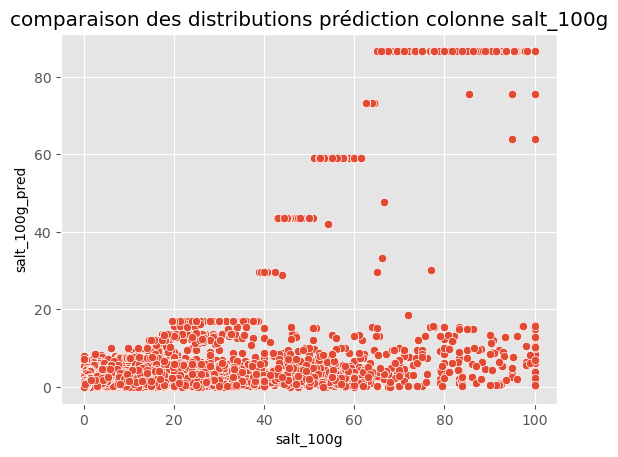

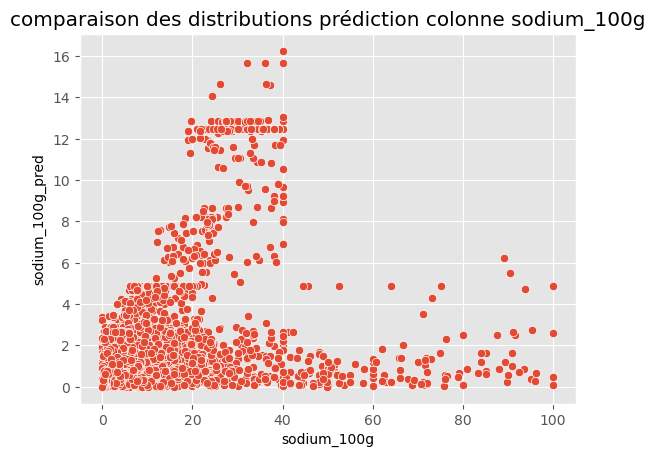

In [68]:
for target, data in dic_cols.items():
    target_pred = target+'_pred'

    sns.scatterplot(data=df, x=target, y=target_pred,)
    plt.title(f'comparaison des distributions prédiction colonne {target}')
    fichier = 'predictg_'+target+'.png'
    plt.savefig(fichier)
    plt.show()

In [69]:
for target, data in dic_cols.items():
    target_pred = target+'_pred'
    df[target].fillna(df[target_pred], inplace=True)

In [70]:
a_traiter = df['nutriscore_score'].isna().sum()/len(df)*100
print(f'La colonne nutriscore_score a {a_traiter:.2f} % de valeur manquantes à traiter')

a_traiter = food['nutriscore_grade'].isna().sum()/len(food)*100
print(f'La colonne nutriscore_grade a {a_traiter:.2f} % de valeur manquantes à traiter')

La colonne nutriscore_score a 0.00 % de valeur manquantes à traiter
La colonne nutriscore_grade a 67.52 % de valeur manquantes à traiter


In [71]:
def calcul_nutriscore(row):
    
    nutri_energy = int(row['energy_100g']/335)
    nutry_sugars = int(row['sugars_100g']/4.5)
    nutri_fat = int(row['saturated-fat_100g']/335)
    nutri_sodium = int(row['sodium_100g']/90*1000) 
    nutri_prot = int(row['proteins_100g']/1.6) 
    nutri_fiber = int(row['fiber_100g']/0.9) 
    
    nutri=0
    
    
    if nutri_energy<11:
        nutri = nutri_energy
    else:
        nutri = 10

    if nutry_sugars<11:
        nutri += nutry_sugars
    else:
        nutri += 10

    if nutri_fat<11:
        nutri += nutri_fat
    else:
        nutri += 10
    
    if nutri_sodium<11:
        nutri += nutri_sodium
    else:
        nutri += 10
        
    if nutri < 11:
        if nutri_prot<6:
            nutri -= nutri_prot
        else:
            nutri -= 5
    if nutri_fiber<6:
        nutri -= nutri_fiber
    else:
        nutri -= 5

    return nutri

df['nutriscore_score_pred'] = df[['nutriscore_score',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']].fillna(0).apply(calcul_nutriscore, axis=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


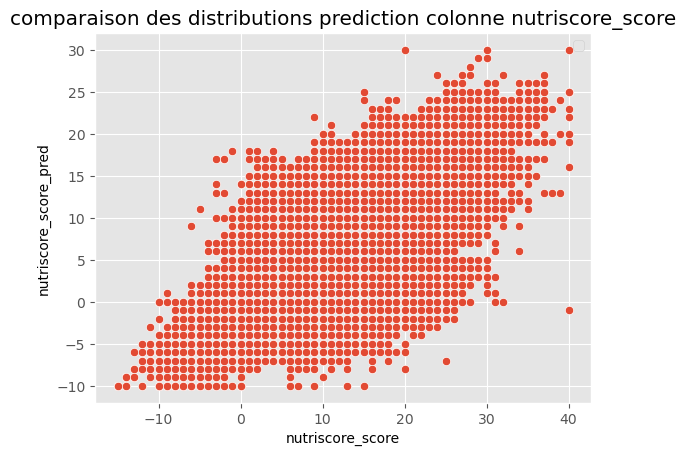

In [72]:
sns.scatterplot(data=df, x='nutriscore_score', y='nutriscore_score_pred')
plt.title(f'comparaison des distributions prediction colonne nutriscore_score')
plt.legend()
fichier = 'predictg_nutriscore_score_pred.jpg'
plt.savefig(fichier)
plt.show()

df['nutriscore_score_pred'].fillna(df['nutriscore_score'], inplace=True)

In [73]:
df['sum_100g']=df['fat_100g']+df['carbohydrates_100g']+df['fiber_100g']+df['proteins_100g']+df['salt_100g']
df.head()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,...,energy_100g_pred,fat_100g_pred,saturated-fat_100g_pred,carbohydrates_100g_pred,sugars_100g_pred,fiber_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred,sum_100g
3,-5.0,238.0,0.2,0.1,3.9,3.9,0.02,10.0,0.09,0.036,...,238.2,0.76,0.416000,4.560,3.080000,0.020000,6.929176,0.53798,0.202477,14.21
11,18.0,936.0,8.2,2.2,29.0,22.0,0.00,5.1,4.60,1.840,...,939.4,11.71,6.283333,26.634,21.099851,0.600000,3.725882,0.76900,0.149200,46.90
20,9.0,264.0,0.0,0.0,15.5,15.5,0.70,0.2,0.00,0.000,...,265.6,0.00,0.020000,15.534,14.794000,0.700000,0.180000,0.00000,0.176200,16.40
23,1.0,134.0,0.3,0.1,5.3,3.9,1.10,0.9,0.42,0.168,...,135.0,0.68,0.110000,5.236,4.702000,1.100000,0.566000,0.27260,0.207308,8.02
32,14.0,1594.0,22.0,15.5,27.3,21.9,4.40,4.6,0.10,0.040,...,1594.4,19.79,9.402000,40.798,17.572757,1.563158,6.914000,0.97350,0.201600,58.40


In [74]:
df['sum_100g'].describe()

count    918769.000000
mean         54.380601
std          33.136088
min           0.000000
25%          24.800000
50%          50.576667
75%          88.900000
max         500.000000
Name: sum_100g, dtype: float64

In [75]:
df= df.loc[df['sum_100g']<=100]

/var/folders/5b/97kkk3b96mjgj39npqqsf5y80000gn/T/ipykernel_3499/3416177578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sugars_100g'])


Text(0.5, 1.0, 'Distribution Sucres_100g après nettoyage multivarié')

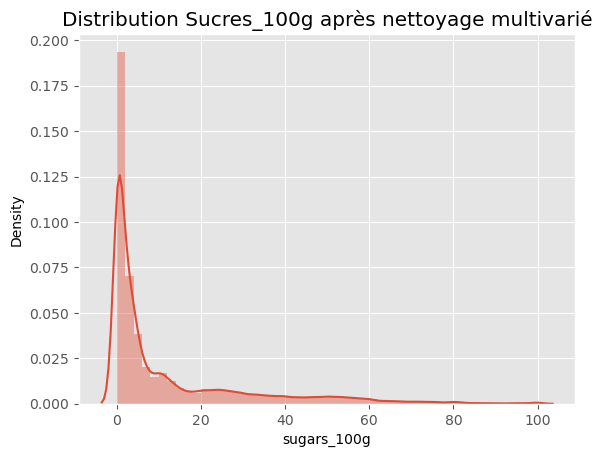

In [76]:
sns.distplot(df['sugars_100g'])
plt.title('Distribution Sucres_100g après nettoyage multivarié')

In [77]:
df= df.drop(columns='sum_100g')

In [78]:
df

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutriscore_score_pred,energy_100g_pred,fat_100g_pred,saturated-fat_100g_pred,carbohydrates_100g_pred,sugars_100g_pred,fiber_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred
3,-5.0,238.0,0.20000,0.100000,3.900000,3.900000,0.020000,10.000000,0.090000,0.036000,-5,238.2,0.760000,0.416000,4.560,3.080000,0.020000,6.929176,0.537980,0.202477
11,18.0,936.0,8.20000,2.200000,29.000000,22.000000,0.000000,5.100000,4.600000,1.840000,16,939.4,11.710000,6.283333,26.634,21.099851,0.600000,3.725882,0.769000,0.149200
20,9.0,264.0,0.00000,0.000000,15.500000,15.500000,0.700000,0.200000,0.000000,0.000000,3,265.6,0.000000,0.020000,15.534,14.794000,0.700000,0.180000,0.000000,0.176200
23,1.0,134.0,0.30000,0.100000,5.300000,3.900000,1.100000,0.900000,0.420000,0.168000,0,135.0,0.680000,0.110000,5.236,4.702000,1.100000,0.566000,0.272600,0.207308
32,14.0,1594.0,22.00000,15.500000,27.300000,21.900000,4.400000,4.600000,0.100000,0.040000,2,1594.4,19.790000,9.402000,40.798,17.572757,1.563158,6.914000,0.973500,0.201600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837599,13.0,1423.0,12.10000,3.900000,47.400000,16.400000,1.460000,8.300000,0.880000,0.352000,4,1424.4,8.738000,4.248000,49.728,16.774000,1.460000,5.588798,1.221000,0.772400
2837600,13.0,1402.0,11.50000,3.300000,48.400000,16.600000,1.720000,8.300000,0.730000,0.292000,4,1399.0,7.694000,5.072000,54.102,18.762035,1.720000,6.748000,1.032000,0.452733
2837601,13.0,2564.0,54.83871,6.451613,19.354839,3.225806,5.126667,19.354839,0.201613,0.080645,-3,2561.6,51.060000,7.140000,13.618,4.952000,5.126667,26.040000,0.610000,0.305600
2837602,13.0,1960.0,22.00000,2.500000,59.000000,2.500000,4.500000,6.000000,2.500000,1.000000,10,1955.0,22.862000,1.468000,63.534,4.480667,3.446667,10.966667,1.624588,0.775400


### KDTree est utiliser pour repérer les valeurs aberrantes multivariées

In [79]:
test_kdtree=df.copy()

In [80]:
scaler = StandardScaler().fit(test_kdtree)
scaled_data= scaler.transform(test_kdtree)
scaled_tree = spatial.KDTree(scaled_data)
neighbours_scaled = scaled_tree.query(scaled_data,k=6)
dist_scaled = pd.DataFrame(neighbours_scaled[0])
dist_scaled = dist_scaled.drop(columns=0)
dist_scaled['mean']=dist_scaled.mean(axis=1)
dist_scaled['mean'].describe()

count    864868.000000
mean          0.298256
std           0.318261
min           0.000000
25%           0.057502
50%           0.236448
75%           0.424226
max          10.574553
Name: mean, dtype: float64

In [81]:
dist_scaled['mean'].quantile(0.99)

1.4465615114796253

In [82]:
dist_scaled.shape[0]-dist_scaled[dist_scaled['mean']<dist_scaled['mean'].quantile(0.99)].count()

1       8649
2       8649
3       8649
4       8649
5       8649
mean    8649
dtype: int64

In [83]:
df['mean']=dist_scaled['mean'].values
df

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,...,energy_100g_pred,fat_100g_pred,saturated-fat_100g_pred,carbohydrates_100g_pred,sugars_100g_pred,fiber_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred,mean
3,-5.0,238.0,0.20000,0.100000,3.900000,3.900000,0.020000,10.000000,0.090000,0.036000,...,238.2,0.760000,0.416000,4.560,3.080000,0.020000,6.929176,0.537980,0.202477,0.000000
11,18.0,936.0,8.20000,2.200000,29.000000,22.000000,0.000000,5.100000,4.600000,1.840000,...,939.4,11.710000,6.283333,26.634,21.099851,0.600000,3.725882,0.769000,0.149200,0.480917
20,9.0,264.0,0.00000,0.000000,15.500000,15.500000,0.700000,0.200000,0.000000,0.000000,...,265.6,0.000000,0.020000,15.534,14.794000,0.700000,0.180000,0.000000,0.176200,0.040455
23,1.0,134.0,0.30000,0.100000,5.300000,3.900000,1.100000,0.900000,0.420000,0.168000,...,135.0,0.680000,0.110000,5.236,4.702000,1.100000,0.566000,0.272600,0.207308,0.078482
32,14.0,1594.0,22.00000,15.500000,27.300000,21.900000,4.400000,4.600000,0.100000,0.040000,...,1594.4,19.790000,9.402000,40.798,17.572757,1.563158,6.914000,0.973500,0.201600,0.693748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837599,13.0,1423.0,12.10000,3.900000,47.400000,16.400000,1.460000,8.300000,0.880000,0.352000,...,1424.4,8.738000,4.248000,49.728,16.774000,1.460000,5.588798,1.221000,0.772400,0.388607
2837600,13.0,1402.0,11.50000,3.300000,48.400000,16.600000,1.720000,8.300000,0.730000,0.292000,...,1399.0,7.694000,5.072000,54.102,18.762035,1.720000,6.748000,1.032000,0.452733,0.462598
2837601,13.0,2564.0,54.83871,6.451613,19.354839,3.225806,5.126667,19.354839,0.201613,0.080645,...,2561.6,51.060000,7.140000,13.618,4.952000,5.126667,26.040000,0.610000,0.305600,0.469759
2837602,13.0,1960.0,22.00000,2.500000,59.000000,2.500000,4.500000,6.000000,2.500000,1.000000,...,1955.0,22.862000,1.468000,63.534,4.480667,3.446667,10.966667,1.624588,0.775400,0.525706


Text(0.5, 1.0, 'Boxplot de la distance moyenne aux 5 KNN après gestion des outliers')

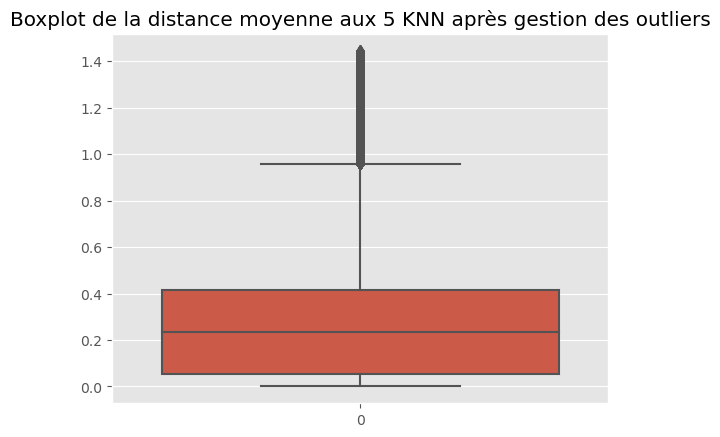

In [84]:
sns.boxplot(dist_scaled['mean'][dist_scaled['mean']<dist_scaled['mean'].quantile(0.99)])
plt.title('Boxplot de la distance moyenne aux 5 KNN après gestion des outliers')

In [85]:
dist_scaled['mean'][dist_scaled['mean']<dist_scaled['mean'].quantile(0.99)]

0         0.000000
1         0.480917
2         0.040455
3         0.078482
4         0.693748
            ...   
864863    0.388607
864864    0.462598
864865    0.469759
864866    0.525706
864867    0.519400
Name: mean, Length: 856219, dtype: float64

In [86]:
df= df.loc[df['mean']<df['mean'].quantile(0.99)]
df

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,...,energy_100g_pred,fat_100g_pred,saturated-fat_100g_pred,carbohydrates_100g_pred,sugars_100g_pred,fiber_100g_pred,proteins_100g_pred,salt_100g_pred,sodium_100g_pred,mean
3,-5.0,238.0,0.20000,0.100000,3.900000,3.900000,0.020000,10.000000,0.090000,0.036000,...,238.2,0.760000,0.416000,4.560,3.080000,0.020000,6.929176,0.537980,0.202477,0.000000
11,18.0,936.0,8.20000,2.200000,29.000000,22.000000,0.000000,5.100000,4.600000,1.840000,...,939.4,11.710000,6.283333,26.634,21.099851,0.600000,3.725882,0.769000,0.149200,0.480917
20,9.0,264.0,0.00000,0.000000,15.500000,15.500000,0.700000,0.200000,0.000000,0.000000,...,265.6,0.000000,0.020000,15.534,14.794000,0.700000,0.180000,0.000000,0.176200,0.040455
23,1.0,134.0,0.30000,0.100000,5.300000,3.900000,1.100000,0.900000,0.420000,0.168000,...,135.0,0.680000,0.110000,5.236,4.702000,1.100000,0.566000,0.272600,0.207308,0.078482
32,14.0,1594.0,22.00000,15.500000,27.300000,21.900000,4.400000,4.600000,0.100000,0.040000,...,1594.4,19.790000,9.402000,40.798,17.572757,1.563158,6.914000,0.973500,0.201600,0.693748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837599,13.0,1423.0,12.10000,3.900000,47.400000,16.400000,1.460000,8.300000,0.880000,0.352000,...,1424.4,8.738000,4.248000,49.728,16.774000,1.460000,5.588798,1.221000,0.772400,0.388607
2837600,13.0,1402.0,11.50000,3.300000,48.400000,16.600000,1.720000,8.300000,0.730000,0.292000,...,1399.0,7.694000,5.072000,54.102,18.762035,1.720000,6.748000,1.032000,0.452733,0.462598
2837601,13.0,2564.0,54.83871,6.451613,19.354839,3.225806,5.126667,19.354839,0.201613,0.080645,...,2561.6,51.060000,7.140000,13.618,4.952000,5.126667,26.040000,0.610000,0.305600,0.469759
2837602,13.0,1960.0,22.00000,2.500000,59.000000,2.500000,4.500000,6.000000,2.500000,1.000000,...,1955.0,22.862000,1.468000,63.534,4.480667,3.446667,10.966667,1.624588,0.775400,0.525706


In [87]:
colonnes_retenues = ['nutriscore_score','energy_100g','fat_100g','saturated-fat_100g',
 'carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']

df[colonnes_retenues].sort_values(by=['nutriscore_score']).head()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
1181008,-15.0,176.0,1.0,1.0,4.2,2.5,8.3,18.0,0.000,0.0000
2346658,-15.0,293.0,0.1,0.0,5.0,1.0,8.0,9.0,0.000,0.0000
2066695,-15.0,228.0,5.0,0.9,8.0,2.1,4.8,9.3,0.000,0.0000
2627001,-15.0,0.0,0.0,0.0,12.0,1.2,14.0,10.0,0.000,0.0000
2121456,-15.0,296.0,0.0,0.0,0.0,0.0,11.5,9.4,0.033,0.0132


In [88]:
test=pd.concat([food_notna, test1], ignore_index=True)

- Taille du jeu final 

In [89]:
len(df[colonnes_retenues])

856219

In [90]:
len(test)

3274539

- Export du fichier nettoyé

In [91]:
# sauvegarde du fichier en fr.openfoodfacts.org.product_nettoye.csv
df[colonnes_retenues].to_csv('fr.openfoodfacts.org.products.clean.csv', sep ='\t')
test.to_csv('openfoodfact.test.csv',sep='\t')